# Cervical Cancer Prediction

## Objective

We have to predict the patients who are most likely to suffer from cervical cancer using Machine Learning algorithms for Classifications, Visualizations and Analysis.

## Knowing the Dataset

- This is an exploration of this Kaggle dataset: https://www.kaggle.com/loveall/cervical-cancer-risk-classification. 
- The actual dataset is obtained from: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

## What is Cervical Cancer?

- Cervical cancer is a malignant	tumour starting in the cells of a woman’s cervix, and possibly spreading or metastasizing to other parts of	her	body.

- About 11,000 new cases of invasive cervical cancer are diagnosed each year in the U.S.

- Although the	number of cases of cervical cancer have	been declining in recent years due to more advanced screening and early detection with the Pap test, 300,000 women worldwide die each year due to cervical cancer.

- In the United States, cervical cancer mortality rates plunged by 74% from 1955 - 1992 thanks to increased screening and early detection with the Pap test. 

The present project focuses on predicting whether a woman will result in having a biopsy (as she may be having cervical cancer)

## Step 0: Basic Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

## Step 1: Load Dataset

In [13]:
data = pd.read_csv("data/kag_risk_factors_cervical_cancer.csv")
print(data.shape)
data.sample(5)

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
677,46,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
173,29,3.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,16.0,16.0,0,0,0,0,0,0,0,0
457,15,3.0,14.0,1.0,1.0,1.266972909,0.5132021277,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,1,0
472,35,2.0,17.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
12,45,4.0,14.0,6.0,0.0,0.0,0.0,1.0,10.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [8]:
print(data['Biopsy'].value_counts())
print(data['Hinselmann'].value_counts())
print(data['Schiller'].value_counts())
print(data['Citology'].value_counts())

0    803
1     55
Name: Biopsy, dtype: int64
0    823
1     35
Name: Hinselmann, dtype: int64
0    784
1     74
Name: Schiller, dtype: int64
0    814
1     44
Name: Citology, dtype: int64


## Step 2: Data Visualisation and Feature Engineering

### 2.1. Check and Fix Dtypes: pd.to_numeric

In [10]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [14]:
numerical = ['Age', 
             'Number of sexual partners', 
             'First sexual intercourse',
                'Num of pregnancies', 
                'Smokes (years)',
                'Smokes (packs/year)',
                'Hormonal Contraceptives (years)',
                'IUD (years)',
                'STDs (number)',
                'STDs: Number of diagnosis',
            'STDs: Time since first diagnosis', 
             'STDs: Time since last diagnosis']

categorical = ['STDs',
               'Smokes',
               'Hormonal Contraceptives',
               'IUD',
               'Dx',
                  'STDs:condylomatosis',
                  'STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis',
                  'STDs:vulvo-perineal condylomatosis', 
                  'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 
                  'STDs:genital herpes',
                  'STDs:molluscum contagiosum', 
                  'STDs:AIDS', 
                  'STDs:HIV',
                  'STDs:Hepatitis B', 
                  'STDs:HPV', 
                  'Dx:Cancer', 
                  'Dx:CIN', 
                  'Dx:HPV']

target = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [15]:
# just to check the 3 lists were created properly
assert len(numerical) + len(categorical) + len(target) == 36

In [16]:
for col in numerical + categorical:
    data[col]=pd.to_numeric(data[col],errors='coerce') 

In [17]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [18]:
data.sample(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
740,40,1.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
43,36,3.0,17.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
550,20,3.0,17.0,1.0,1.0,1.0,0.1,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


### 2.2. Missing Values: Numerical-->SimpleImputer, Categorical-->df.dropna

In [20]:
data[numerical + categorical + target].isnull().sum()/data.shape[0] *100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives (years)       12.587413
IUD (years)                           13.636364
STDs (number)                         12.237762
STDs: Number of diagnosis              0.000000
STDs: Time since first diagnosis      91.724942
STDs: Time since last diagnosis       91.724942
STDs                                  12.237762
Smokes                                 1.515152
Hormonal Contraceptives               12.587413
IUD                                   13.636364
Dx                                     0.000000
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12

In [24]:
len(numerical), numerical.remove("STDs: Time since first diagnosis"), len(numerical)

(12, None, 11)

In [27]:
len(numerical), numerical.remove("STDs: Time since last diagnosis"), len(numerical)

(11, None, 10)

In [30]:
len(numerical) + len(categorical) + len(target)
data.shape  

(858, 36)

In [28]:
# Check number of missing values for each of the remaining features. 
data[numerical + categorical + target].isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives (years)       108
IUD (years)                           117
STDs (number)                         105
STDs: Number of diagnosis               0
STDs                                  105
Smokes                                 13
Hormonal Contraceptives               108
IUD                                   117
Dx                                      0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                         

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [32]:
data[numerical] = pd.DataFrame(imputer.fit_transform(data[numerical]))

In [33]:
data[numerical + categorical + target].isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives (years)         0
IUD (years)                             0
STDs (number)                           0
STDs: Number of diagnosis               0
STDs                                  105
Smokes                                 13
Hormonal Contraceptives               108
IUD                                   117
Dx                                      0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                         

In [34]:
data.shape

(858, 36)

In [35]:
data.dropna(axis=0,subset=categorical,inplace=True) #axis=0 denotes row wise

In [36]:
data.shape

(726, 36)

In [37]:
data[numerical + categorical + target].isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs: Number of diagnosis             0
STDs                                  0
Smokes                                0
Hormonal Contraceptives               0
IUD                                   0
Dx                                    0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0


### 2.3. Numerical Feature Analysis:  Correlation

In [58]:
df_num = data[numerical].copy()

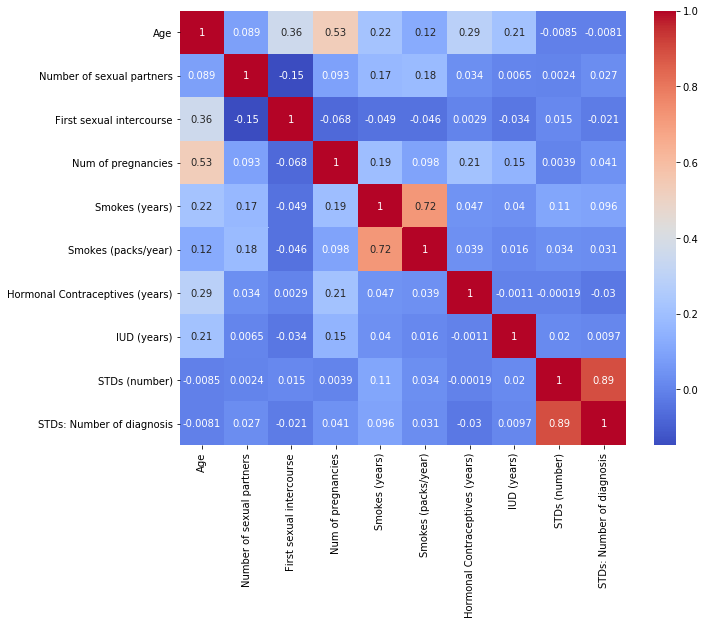

In [59]:
ax, fig = plt.subplots(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

Drop `STDs (number)`

In [60]:
len(numerical), numerical.remove("STDs (number)"), len(numerical)

(10, None, 9)

### 2.4. Numerical Feature Analysis:  Outliers

In [61]:
for k, v in data[numerical].items(): #k=column_name, v=values
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data[numerical])[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 1.10%
Column Number of sexual partners outliers = 8.13%
Column First sexual intercourse outliers = 5.23%
Column Num of pregnancies outliers = 3.44%
Column Smokes (years) outliers = 100.00%
Column Smokes (packs/year) outliers = 100.00%
Column Hormonal Contraceptives (years) outliers = 9.09%
Column IUD (years) outliers = 100.00%
Column STDs: Number of diagnosis outliers = 100.00%


### 2.5. Numerical Feature Analysis: Distplot

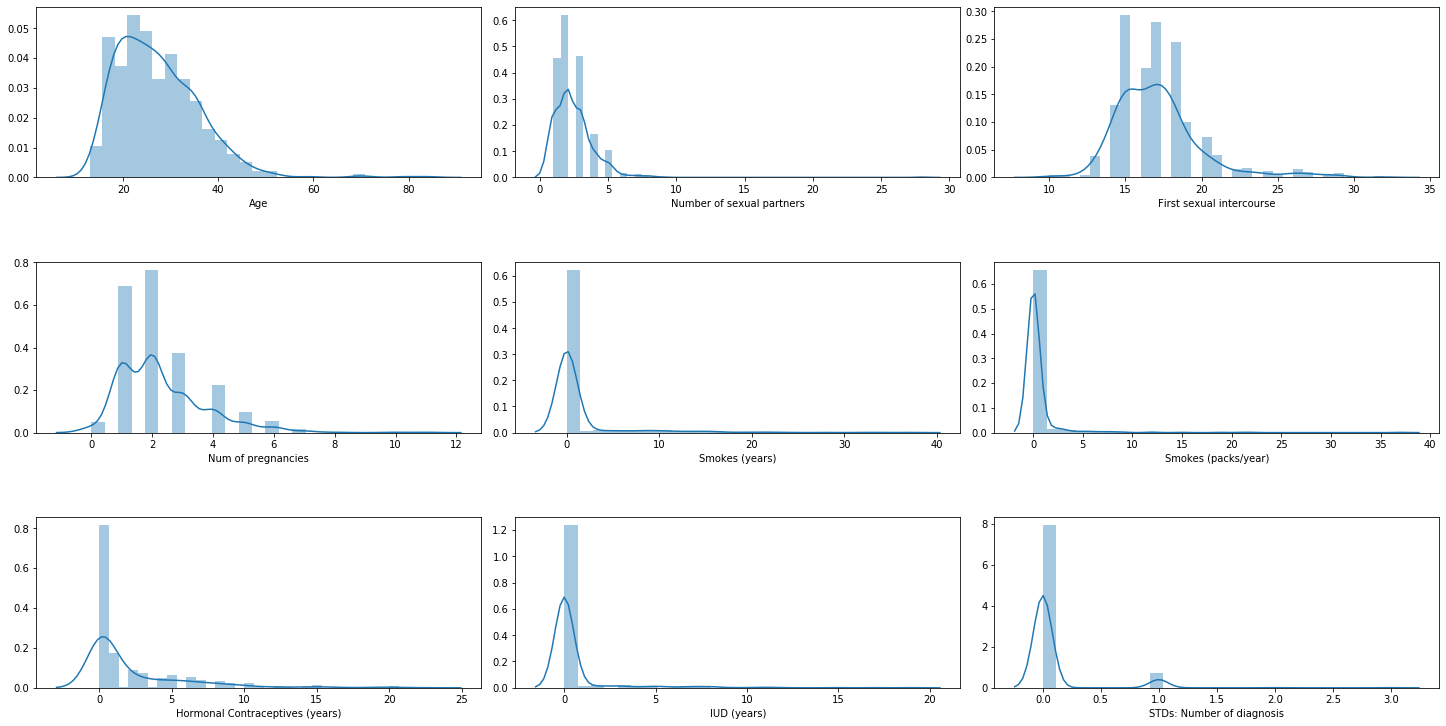

In [62]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data[numerical].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2.6. Categorical Feature Analysis: Catplot

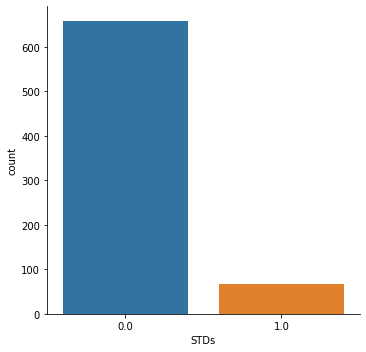

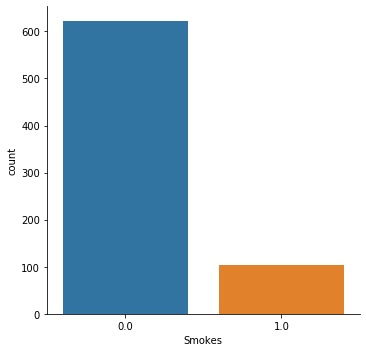

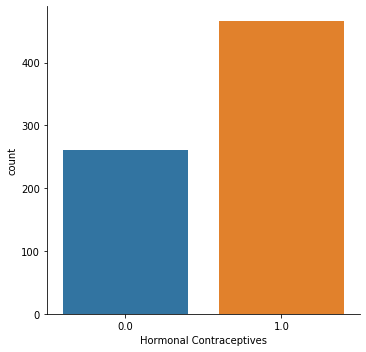

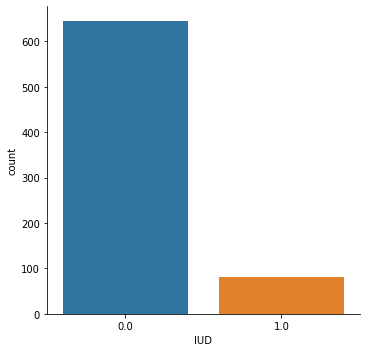

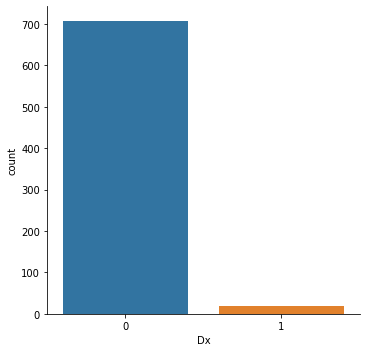

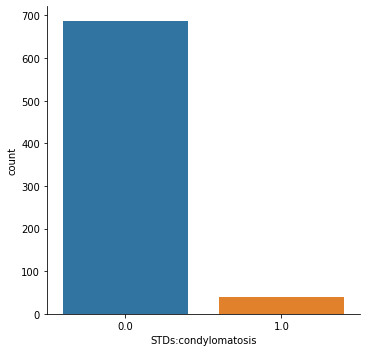

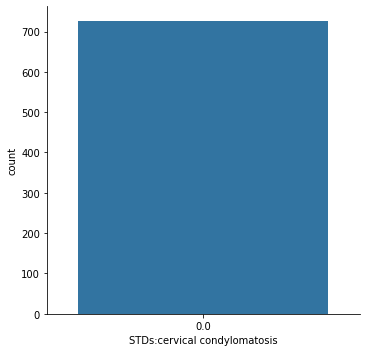

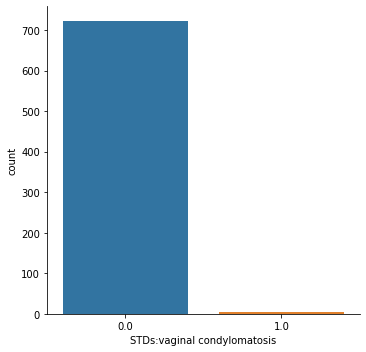

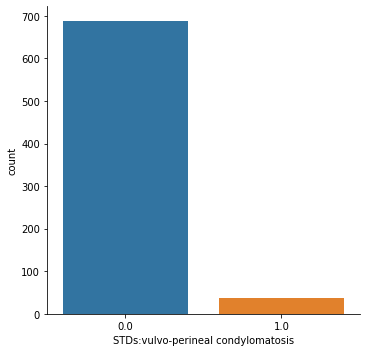

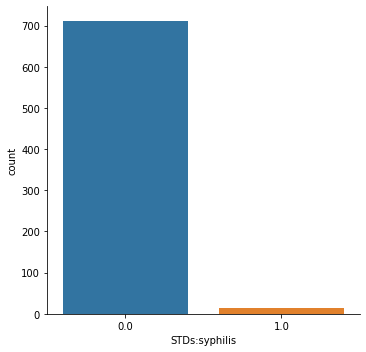

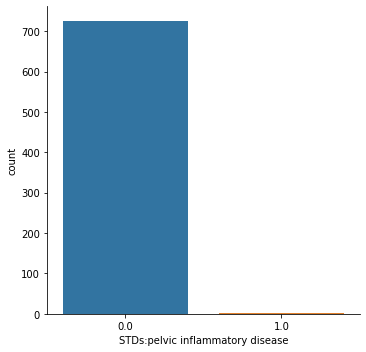

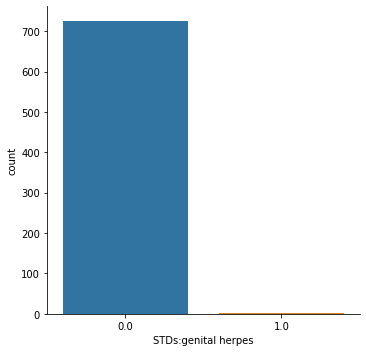

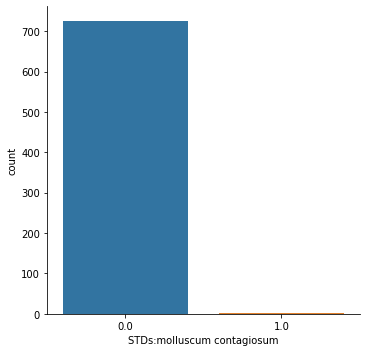

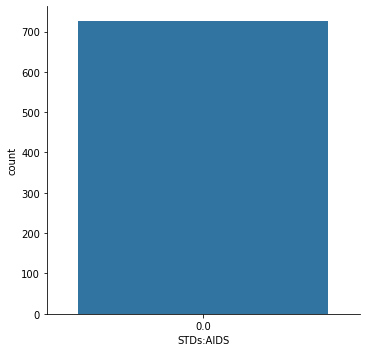

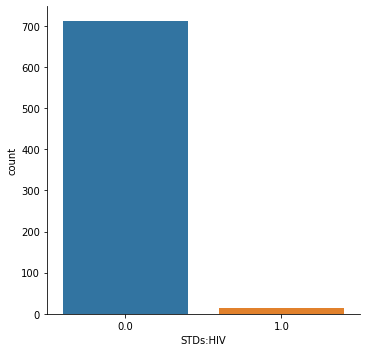

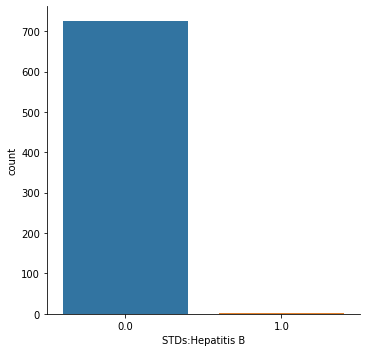

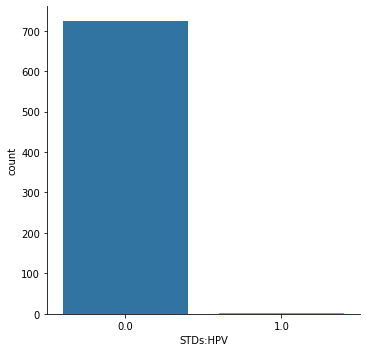

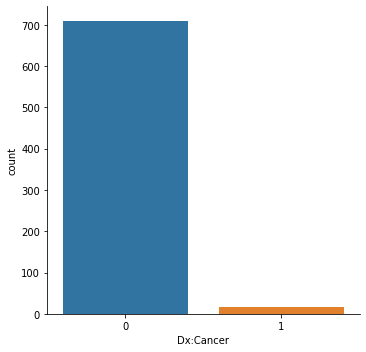

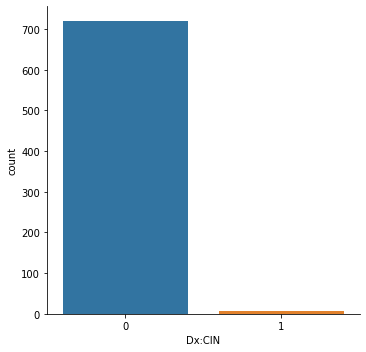

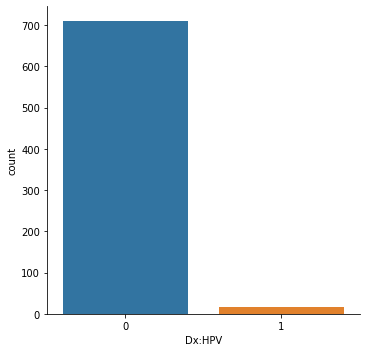

In [63]:
for feature in categorical:
    sns.catplot(feature,data=data,kind='count')

Observations:
- `STDs:AIDS` and `STDs:cervical condylomatosis` has only 0 values. We can possibly drop this column
- `Hormonal Contraceptive` column has the highest number of one's which indicate that this might be the important key feature in detecting the cervical cancer. So let us concentrate on this feature more in future analysis.

In [64]:
len(categorical), categorical.remove("STDs:AIDS"), len(categorical)

(20, None, 19)

In [65]:
len(categorical), categorical.remove("STDs:cervical condylomatosis"), len(categorical)

(19, None, 18)

From the three columns/features `Smokes`, `Smokes (years)`, `Smokes (packs/year)` we can remove the column `Smokes` because `Smokes (years)` will represent the `Smokes` column as `Smoke (years)` column has non-zero value only when `Smokes` column has non-zero value. Also, the predictions depends on the number of years the person is smoking rather than just whether the smokes or not.

In [66]:
#drop the smokes features
len(categorical), categorical.remove("Smokes"), len(categorical)

(18, None, 17)

In [67]:
#### Similar study as Smokes can be conducted for other features like Harmonal Contraceptives etc.
len(categorical), categorical.remove("Hormonal Contraceptives"), len(categorical)

(17, None, 16)

In [68]:
### Dropping IUD column because IUD (years) has a non-zero value only if IUD is non-zero.
len(categorical), categorical.remove("IUD"), len(categorical)

(16, None, 15)

In [69]:
## same logic for Dx
len(categorical), categorical.remove("Dx"), len(categorical)

(15, None, 14)

## Step 3: Defining Training and Test Set

There are 4 target variables in the dataset. 

For building the model, Let us consider a new variable cervical_cancer which is the sum of the 4 target variables. 

That is, `Cervical_cancer = Hinselmann + Schiller + Citology + Biopsy` 

This gives five different values ranging from 0 to 4. These values represent the level of risk i.e. 0 represent no risk and 4 represents higher level of risk. So, the final class/target variables are 0, 1, 2, 3, 4.

In [105]:
data['cervical_cancer'] = data[['Hinselmann', 'Schiller','Citology','Biopsy']].apply(np.sum, axis=1)

In [106]:
data['cervical_cancer'] = data['cervical_cancer'].astype(int)

In [107]:
data.sample(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cervical_cancer
211,27.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
475,19.0,4.0,15.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0
456,16.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0


In [108]:
data['cervical_cancer'].unique()

array([0, 3, 1, 2, 4])

In [110]:
data["cervical_cancer"].value_counts()/data.shape[0] *100

0    87.190083
1     4.958678
3     4.407713
2     2.754821
4     0.688705
Name: cervical_cancer, dtype: float64

In [119]:
new_data = data[numerical + categorical + ["cervical_cancer"]].copy()
print(new_data.shape)

new_data.sample(3)

(726, 24)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs: Number of diagnosis,STDs,STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,cervical_cancer
255,25.0,2.0,18.0,2.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
254,25.0,3.0,18.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
631,20.0,3.0,15.0,2.0,3.0,3.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
data_train, data_test = train_test_split(new_data, test_size=0.25, random_state=0)
data_train.shape, data_test.shape

((544, 24), (182, 24))

In [115]:
X_train = data_train[numerical + categorical].values.astype(np.float64)
y_train = data_train['cervical_cancer'].values.astype(np.int64)

In [116]:
print('Final feature vector shape:',X_train.shape)
print('Final target vector shape',y_train.shape)

Final feature vector shape: (544, 23)
Final target vector shape (544,)


In [121]:
np.unique(y_train, return_counts=True) #the dataset is imbalanced

(array([0, 1, 2, 3, 4]), array([477,  27,  17,  20,   3]))

In [118]:
X_test = data_test[numerical + categorical].values.astype(np.float64)
y_test = data_test["cervical_cancer"].values.astype(np.int64) ##make sure to do deepcopy
X_test.shape, y_test.shape

((182, 23), (182,))

## Step 4: Data Scaling & Array conversion

In [122]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Step 5.1: Simple Modelling

In [123]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

# creating the model
model = LogisticRegression(solver="sag", 
                           multi_class="auto",
                           class_weight="balanced",
                           max_iter=5000)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.4209558823529412
Testing accuracy : 0.4010989010989011
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       156
           1       0.06      0.22      0.09         9
           2       0.00      0.00      0.00         3
           3       0.14      0.33      0.20        12
           4       0.00      0.00      0.00         2

    accuracy                           0.40       182
   macro avg       0.22      0.20      0.17       182
weighted avg       0.79      0.40      0.52       182

[[67 30 23 22 14]
 [ 3  2  2  2  0]
 [ 1  2  0  0  0]
 [ 3  1  3  4  1]
 [ 0  1  0  1  0]]


### SVM

In [125]:
from sklearn.svm import SVC

# creating the model
model = SVC(gamma="auto", 
            kernel='rbf', #radial basis function
            class_weight="balanced")

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.6875
Testing accuracy : 0.5604395604395604
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       156
           1       0.05      0.22      0.08         9
           2       0.00      0.00      0.00         3
           3       0.17      0.25      0.20        12
           4       0.00      0.00      0.00         2

    accuracy                           0.56       182
   macro avg       0.22      0.22      0.20       182
weighted avg       0.78      0.56      0.64       182

[[97 33 14 12  0]
 [ 4  2  0  3  0]
 [ 1  2  0  0  0]
 [ 5  3  1  3  0]
 [ 2  0  0  0  0]]


### Decision Trees

In [126]:
from sklearn.tree import DecisionTreeClassifier

#creating the model
model = DecisionTreeClassifier(class_weight="balanced")

# feeding the training data into the model
model.fit(X_train, y_train)

#predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.7417582417582418
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       156
           1       0.08      0.11      0.10         9
           2       0.00      0.00      0.00         3
           3       0.09      0.08      0.09        12
           4       0.00      0.00      0.00         2

    accuracy                           0.74       182
   macro avg       0.21      0.21      0.21       182
weighted avg       0.76      0.74      0.75       182

[[133   9   4  10   0]
 [  6   1   1   0   1]
 [  3   0   0   0   0]
 [  8   2   1   1   0]
 [  2   0   0   0   0]]


### Decision Tree Visualisation

In [ ]:
#export_graphviz function converts decision tree classifier into dot file and 
#pydotplus convert this dot file to #png or displayable form on Jupyter.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,
                feature_names=numerical+categorical,
                filled=True, rounded=True,
                special_characters=True)
    
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cervical_cancer.png')
Image(graph.create_png())

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

### XGBoost

In [ ]:
import xgboost as xgb

eval_set = [(X_test, y_test)]

model = xgb.XGBClassifier(gamma=0.024, learning_rate=0.3, 
                          max_depth=6,
                          nthread=4,
                          n_estimators=1000,
                          objective="multi:softmax")

model.silent=True #can also be "False"

model.fit(X_train,y_train, early_stopping_rounds=10, 
          eval_set=eval_set,
          verbose=True,
          eval_metric="merror")

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

## Step 5.2: Handling Imbalance in Dataset with Synthetic Minority Over-sampling Technique - SMOTE

In [127]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

As there are only 5 data points in the class 4, it is difficult to train and test the model. To overcome this problem of imbalance, oversampling technique is used with SMOTE.

In [ ]:
#y_train = y_train.astype(int)
#y_train = y_train.ravel()

In [128]:
X_train.shape, y_train.shape, np.unique(y_train, return_counts=True)

((544, 23), (544,), (array([0, 1, 2, 3, 4]), array([477,  27,  17,  20,   3])))

In [129]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy="not majority", 
                         k_neighbors=2).fit_resample(X_train, y_train)

/anaconda3/envs/tutor/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [130]:
X_train.shape, y_train.shape, np.unique(y_train, return_counts=True)

((2385, 23),
 (2385,),
 (array([0, 1, 2, 3, 4]), array([477, 477, 477, 477, 477])))

### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# creating the model
model = LogisticRegression(solver="sag", multi_class="auto", max_iter=5000)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

Training accuracy : 0.5966457023060797
Testing accuracy : 0.27472527472527475
              precision    recall  f1-score   support

           0       0.92      0.28      0.43       156
           1       0.06      0.33      0.10         9
           2       0.00      0.00      0.00         3
           3       0.10      0.25      0.14        12
           4       0.00      0.00      0.00         2

    accuracy                           0.27       182
   macro avg       0.21      0.17      0.13       182
weighted avg       0.79      0.27      0.38       182



### SVM

In [134]:
from sklearn.svm import SVC

# creating the model
model = SVC(gamma="auto", kernel='rbf')

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7568134171907757
Testing accuracy : 0.33516483516483514
              precision    recall  f1-score   support

           0       0.90      0.37      0.52       156
           1       0.04      0.22      0.06         9
           2       0.00      0.00      0.00         3
           3       0.07      0.17      0.10        12
           4       0.00      0.00      0.00         2

    accuracy                           0.34       182
   macro avg       0.20      0.15      0.14       182
weighted avg       0.78      0.34      0.46       182

[[57 46 28 24  1]
 [ 2  2  2  3  0]
 [ 2  1  0  0  0]
 [ 2  5  3  2  0]
 [ 0  2  0  0  0]]


### Decision Trees

In [136]:
from sklearn.tree import DecisionTreeClassifier

# creating the model
model_s = DecisionTreeClassifier()

# feeding the training data into the model
model_s.fit(X_train, y_train)

# predicting the test set results
y_pred = model_s.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model_s.score(X_train, y_train))
print("Testing accuracy :", model_s.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.6868131868131868
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       156
           1       0.06      0.11      0.07         9
           2       0.00      0.00      0.00         3
           3       0.21      0.25      0.23        12
           4       0.00      0.00      0.00         2

    accuracy                           0.69       182
   macro avg       0.23      0.23      0.23       182
weighted avg       0.79      0.69      0.73       182

[[121  15  12   7   1]
 [  5   1   0   3   0]
 [  1   1   0   1   0]
 [  6   1   2   3   0]
 [  2   0   0   0   0]]


### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rf = RandomForestClassifier()

# feeding the training data into the model
model_rf.fit(X_train, y_train)

# predicting the test set results
y_pred = model_rf.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model_rf.score(X_train, y_train))
print("Testing accuracy :", model_rf.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9983228511530399
Testing accuracy : 0.7967032967032966
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       156
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         3
           3       0.30      0.25      0.27        12
           4       0.00      0.00      0.00         2

    accuracy                           0.80       182
   macro avg       0.24      0.23      0.23       182
weighted avg       0.78      0.80      0.79       182

[[142   8   1   5   0]
 [  7   0   0   2   0]
 [  2   1   0   0   0]
 [  7   1   1   3   0]
 [  2   0   0   0   0]]


### AdaBoost

In [139]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.4389937106918239
Testing accuracy : 0.22527472527472528
              precision    recall  f1-score   support

           0       0.85      0.22      0.35       156
           1       0.07      0.56      0.12         9
           2       0.00      0.00      0.00         3
           3       0.05      0.17      0.08        12
           4       0.00      0.00      0.00         2

    accuracy                           0.23       182
   macro avg       0.19      0.19      0.11       182
weighted avg       0.74      0.23      0.31       182

[[34 59 29 31  3]
 [ 1  5  0  3  0]
 [ 1  1  0  1  0]
 [ 3  6  1  2  0]
 [ 1  1  0  0  0]]


### XgBoost

In [135]:
import xgboost as xgb

eval_set = [(X_test, y_test)]

model_xgbs = xgb.XGBClassifier(gamma=0.024, learning_rate=0.3, 
                          max_depth=6,
                          nthread=4,
                          n_estimators=1000,
                          objective="multi:softmax")

model_xgbs.silent=False

model_xgbs.fit(X_train,y_train, early_stopping_rounds=10, 
          eval_set=eval_set,
          verbose=True,
          eval_metric="merror") #https://xgboost.readthedocs.io/en/latest/parameter.html

# predicting the test set results
y_pred = model_xgbs.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model_xgbs.score(X_train, y_train))
print("Testing accuracy :", model_xgbs.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

[0]	validation_0-merror:0.428571
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.423077
[2]	validation_0-merror:0.32967
[3]	validation_0-merror:0.32967
[4]	validation_0-merror:0.32967
[5]	validation_0-merror:0.313187
[6]	validation_0-merror:0.291209
[7]	validation_0-merror:0.269231
[8]	validation_0-merror:0.285714
[9]	validation_0-merror:0.269231
[10]	validation_0-merror:0.258242
[11]	validation_0-merror:0.258242
[12]	validation_0-merror:0.236264
[13]	validation_0-merror:0.225275
[14]	validation_0-merror:0.225275
[15]	validation_0-merror:0.225275
[16]	validation_0-merror:0.21978
[17]	validation_0-merror:0.225275
[18]	validation_0-merror:0.225275
[19]	validation_0-merror:0.230769
[20]	validation_0-merror:0.230769
[21]	validation_0-merror:0.236264
[22]	validation_0-merror:0.236264
[23]	validation_0-merror:0.230769
[24]	validation_0-merror:0.225275
[25]	validation_0-merror:0.21978
[26]	validation_0-merror:0.208791
[27]	validation_0-merror:0.208

### References:

- https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8070120
- https://www.youtube.com/watch?v=TFPhhioOuZc